In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.6f}'.format  

# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [48]:
df_origin = pd.read_csv('./datasets/원본data.csv',index_col=0)
df=pd.read_csv('./datasets/원본data.csv',index_col=0)


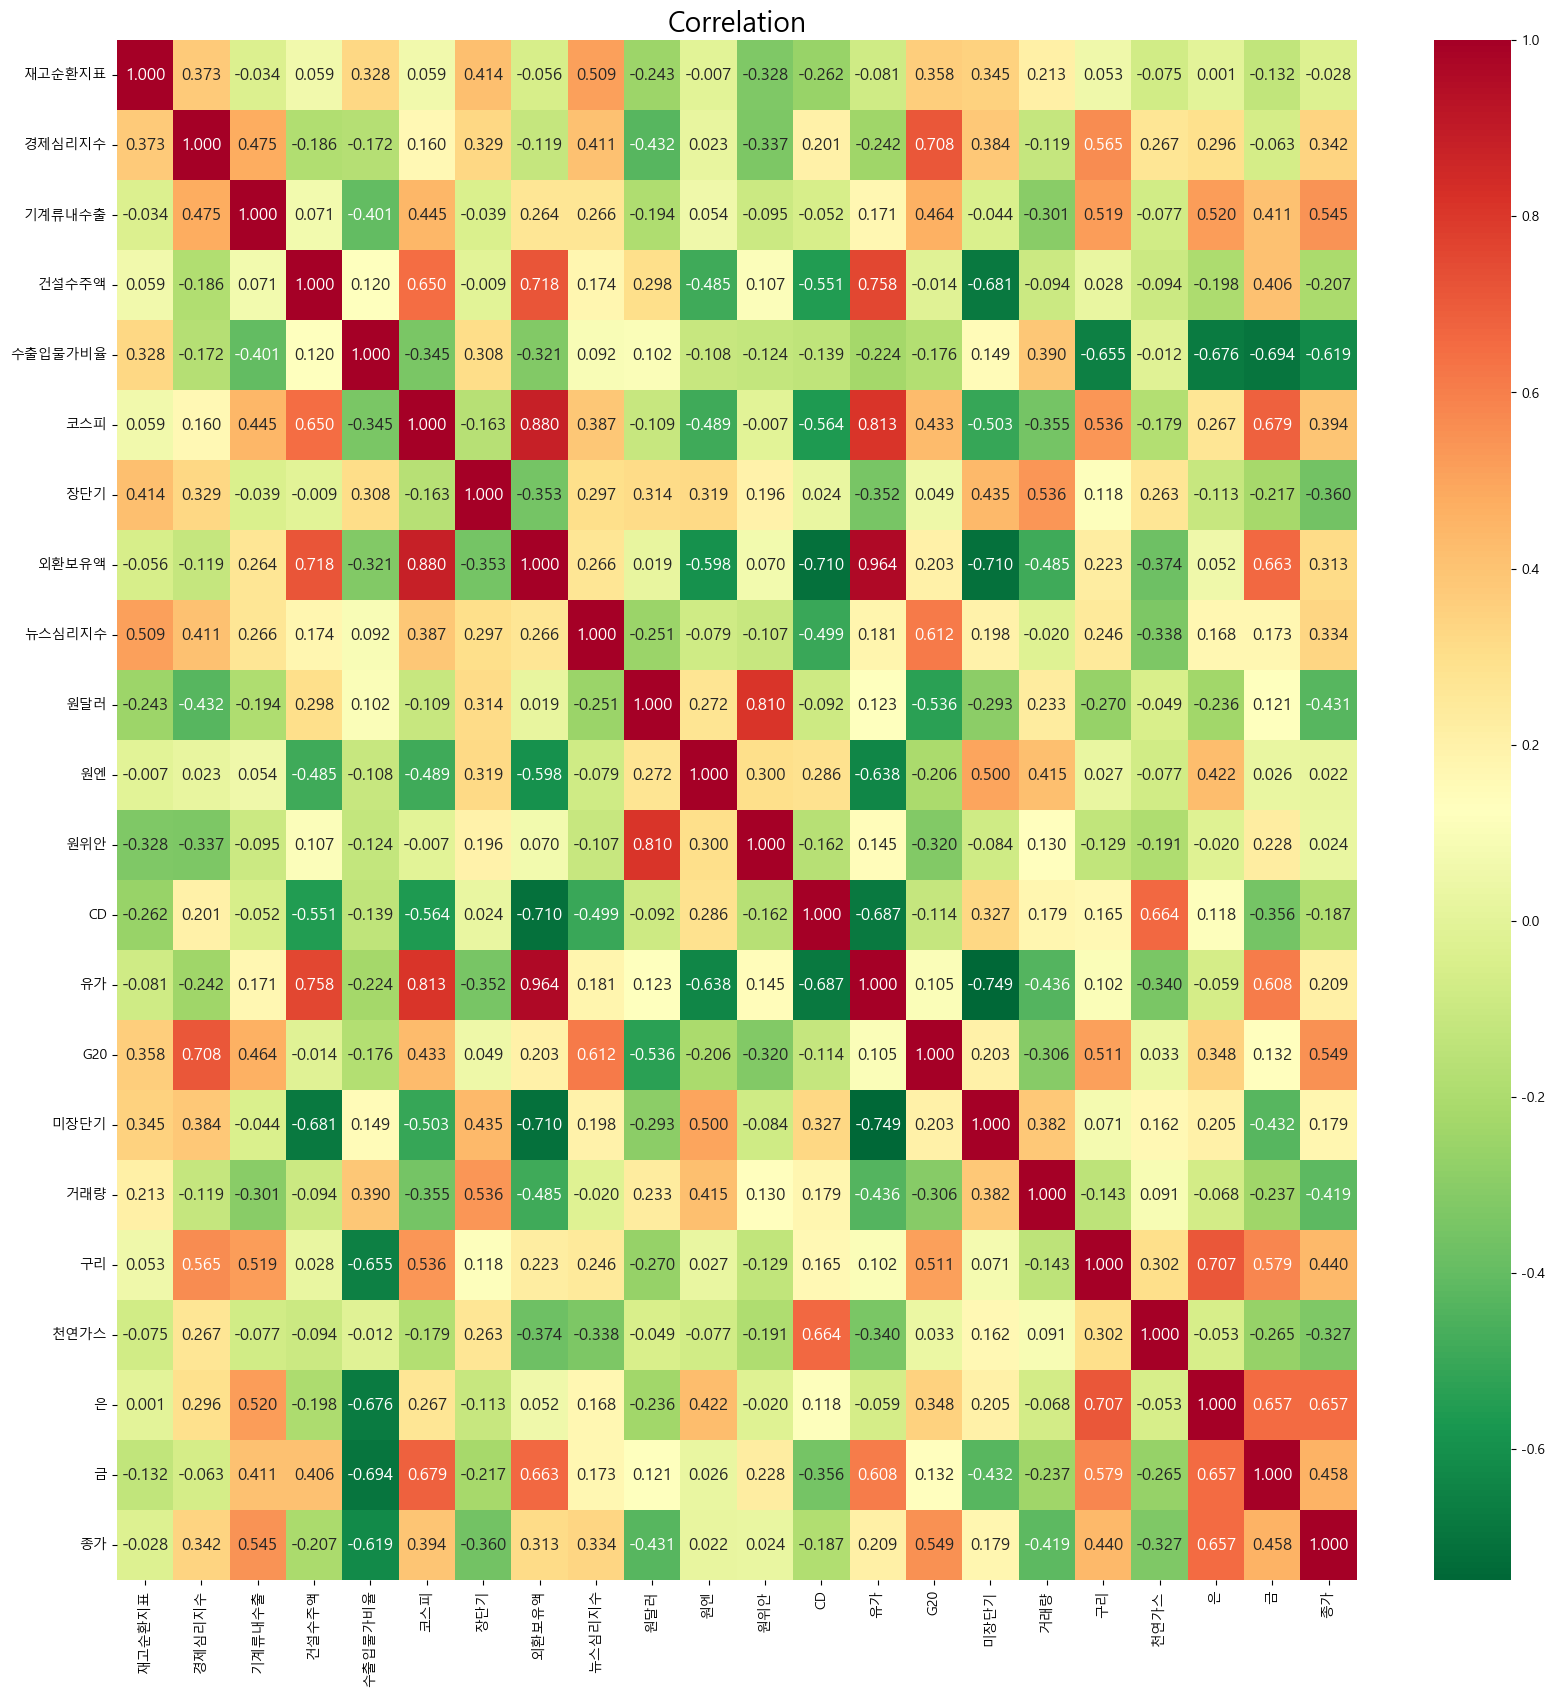

In [49]:
fig,ax= plt.subplots(1,1,figsize=(20,20),sharey=True)

sns.heatmap(df.corr(), annot=True,fmt='.3f' ,annot_kws={'size':12}, cmap="RdYlGn_r")
plt.title('Correlation', fontsize=20)
plt.show()

In [50]:
## 경제심리지수, 기계류내수출,수출입물가비율 ,장단기금리차, 외환보유액, 뉴스심리지수, 원달러,G20, 천연가스--> 정상적이다

## G7. G20은 비슷하므로 G7 drop
#df2=df2.drop('G7',axis=1)

df['재고순환지표']+=25
df['재고순환지표']=np.log1p(df['재고순환지표']/df['재고순환지표'].shift(1))
df['건설수주액']=np.log1p(df['건설수주액']/df['건설수주액'].shift(1))
df['코스피']=np.log1p(df['코스피']/df['코스피'].shift(1))
df['원엔']=np.log1p(df['원엔']/df['원엔'].shift(1))
df['원위안']=np.log1p(df['원위안']/df['원위안'].shift(1))
df['CD']=np.log1p(df['CD']/df['CD'].shift(1))
df['유가']=np.log1p(df['유가']/df['유가'].shift(1))
df['미장단기']+=0.9
df['미장단기']=np.log1p(df['미장단기']/df['미장단기'].shift(1))
df['거래량']=np.log1p(df['거래량']/df['거래량'].shift(1))
df['구리']=np.log1p(df['구리']/df['구리'].shift(1))
df['은']=np.log1p(df['은']/df['은'].shift(1))
df['금']=np.log1p(df['금']/df['금'].shift(1))

df['종가']=np.log(df['종가']/df['종가'].shift(1))
df=df.dropna(axis=0)


In [51]:
df.drop(['유가','은','원위안'],axis=1,inplace=True)

In [52]:
### H0가 비정상(non-stationary)이다
### 유의수준보다 p-value가 작으면 기각 --> 정상적 데이터다

from statsmodels.tsa.stattools import adfuller
import pandas as pd
pd.options.display.float_format = '{:.6f}'.format

adf_df = pd.DataFrame()  # 빈 데이터프레임 생성

for i in df.columns:
    adf_sample = adfuller(df[i], autolag='AIC')
    
    adf_result = pd.Series(adf_sample[:4], index=['stat', 'p_value', 'lag', 'observ'])
    sig_level = adf_sample[4]['5%']
    adf_result['5%'] = sig_level
    
    adf_df[i] = adf_result  # 결과를 데이터프레임에 열(column)로 추가

adf_df = adf_df.transpose()  # 행(row)과 열(column)을 전환하여 변환
adf_df

,stat,p_value,lag,observ,5%
재고순환지표,-7.304759,0.000000,3.000000,179.000000,-2.877826
경제심리지수,-3.325043,0.013795,11.000000,171.000000,-2.878595
기계류내수출,-3.823751,0.002673,11.000000,171.000000,-2.878595
건설수주액,-3.364965,0.012213,12.000000,170.000000,-2.878696
수출입물가비율,-3.070182,0.028840,13.000000,169.000000,-2.878799
코스피,-4.450479,0.000241,12.000000,170.000000,-2.878696
장단기,-3.516219,0.007580,13.000000,169.000000,-2.878799
외환보유액,-2.878236,0.047938,11.000000,171.000000,-2.878595
뉴스심리지수,-5.616294,0.000001,12.000000,170.000000,-2.878696
원달러,-3.601805,0.005727,0.000000,182.000000,-2.877555


In [53]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터프레임으로부터 독립변수들을 선택하여 X에 저장
X = df[['재고순환지표', '경제심리지수', '기계류내수출', '건설수주액', '수출입물가비율', '코스피', '장단기', '외환보유액',
       '뉴스심리지수', '원달러', '원엔', 'CD', 'G20', '미장단기', '거래량', '구리', '천연가스', '금',
       '종가']]

# statsmodels의 상수항을 추가하기 위해 X에 상수 열 추가
X = sm.add_constant(X)

# VIF 계산
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 결과 출력
print(vif)

    Feature   VIF Factor
0     const 20229.923510
1    재고순환지표     1.187788
2    경제심리지수     4.560598
3    기계류내수출     1.721250
4     건설수주액     1.112825
5   수출입물가비율     1.660449
6       코스피     2.850201
7       장단기     3.220621
8     외환보유액     2.301997
9    뉴스심리지수     4.487826
10      원달러     2.442384
11       원엔     1.705738
12       CD     1.842908
13      G20     3.963716
14     미장단기     1.087409
15      거래량     1.106734
16       구리     1.741645
17     천연가스     1.907380
18        금     1.314007
19       종가     1.592490


In [54]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=df)            
res = model_var.select_order(6)            
res.summary()

,AIC,BIC,FPE,HQIC
0,-2.597,-2.256,0.07447,-2.459
1,-27.77,-20.95*,8.904e-13,-25.00*
2,-30.36,-17.07,7.475e-14,-24.97
3,-31.47,-11.69,3.481e-14,-23.45
4,-32.78,-6.532,1.881e-14,-22.14
5,-34.57,-1.842,1.149e-14,-21.30
6,-37.05*,2.162,9.451e-15*,-21.14


In [55]:
model_fit = model_var.fit(maxlags=6, ic='aic')        
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Jun, 2023
Time:                     14:00:58
--------------------------------------------------------------------
No. of Equations:         19.0000    BIC:                    2.16221
Nobs:                     177.000    HQIC:                  -21.1448
Log likelihood:           691.698    FPE:                9.45066e-15
AIC:                     -37.0462    Det(Omega_mle):     6.99327e-19
--------------------------------------------------------------------
Results for equation 재고순환지표
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -7.609224         9.048113           -0.841           0.400
L1.재고순환지표         -0.007200         0.132086           -0.055           0.957
L1.경제심리지수          0.065305         0.021283            3.068          

In [56]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

model_var = VAR(endog=df.iloc[:147][['원엔','G20','미장단기','구리','종가']])             ## X_train을 endogenous 변수로 설정한 후
res = model_var.select_order(6)            ## select_order 메서드를 호출하여 최적의 차수를 선택, select_order 메서드는 다양한 정보 기준(AIC, BIC, HQIC)을 사용하여 최적의 모델 차수를 추정
res.summary()

,AIC,BIC,FPE,HQIC
0,-26.16,-26.06,4.342e-12,-26.12
1,-28.59,-27.96*,3.851e-13,-28.33
2,-28.63,-27.48,3.689e-13,-28.16
3,-29.17,-27.50,2.156e-13,-28.49*
4,-29.12,-26.93,2.270e-13,-28.23
5,-29.25*,-26.53,2.023e-13*,-28.15
6,-29.20,-25.96,2.152e-13,-27.89


In [57]:
import pandas as pd

# train 데이터 프레임 정의
train_data = df.iloc[:147][['원엔','G20','미장단기','구리','종가']]
train = pd.DataFrame(train_data)

# test 데이터 프레임 정의
test_data = df.iloc[147:][['원엔','G20','미장단기','구리','종가']]
test = pd.DataFrame(test_data)

# Initialize empty DataFrame to store predictions
pred = pd.DataFrame(columns=train.columns)

for t in range(len(test)):
    # Fit VAR model
    model_var = VAR(endog=train)
    model_fit = model_var.fit(maxlags=5, ic='aic')

    # One step forecast
    forecast = model_fit.forecast(train.values[-5:], steps=1)

    # Append the prediction to pred DataFrame
    pred = pd.concat([pred, pd.DataFrame(forecast, columns=pred.columns)], ignore_index=True)

    # Append the current test observation to train DataFrame for the next training
    train = pd.concat([train, test.iloc[[t]]], ignore_index=True)

pred.reset_index(drop=True, inplace=True)


In [58]:
pred['date']= test.index
pred=pred.set_index('date')

In [59]:
show

,예측,실제,실제종가,0
2020-05,-1.341569,0.116203,1047.710000,273.908163
2020-06,-0.263815,0.098670,1156.360000,888.218124
2020-07,0.794030,-0.033584,1118.170000,2473.720571
2020-08,0.031429,0.081749,1213.420000,1252.162766
2020-09,0.030029,0.160504,1424.680000,1468.110689
2020-10,-0.008085,0.030546,1468.870000,1457.041835
2020-11,-0.004130,-0.035161,1418.120000,1412.275602
2020-12,-0.018834,0.096859,1562.350000,1533.200512
2021-01,0.028040,0.102901,1731.680000,1780.922814
2021-02,-0.004857,0.124357,1960.990000,1951.489404


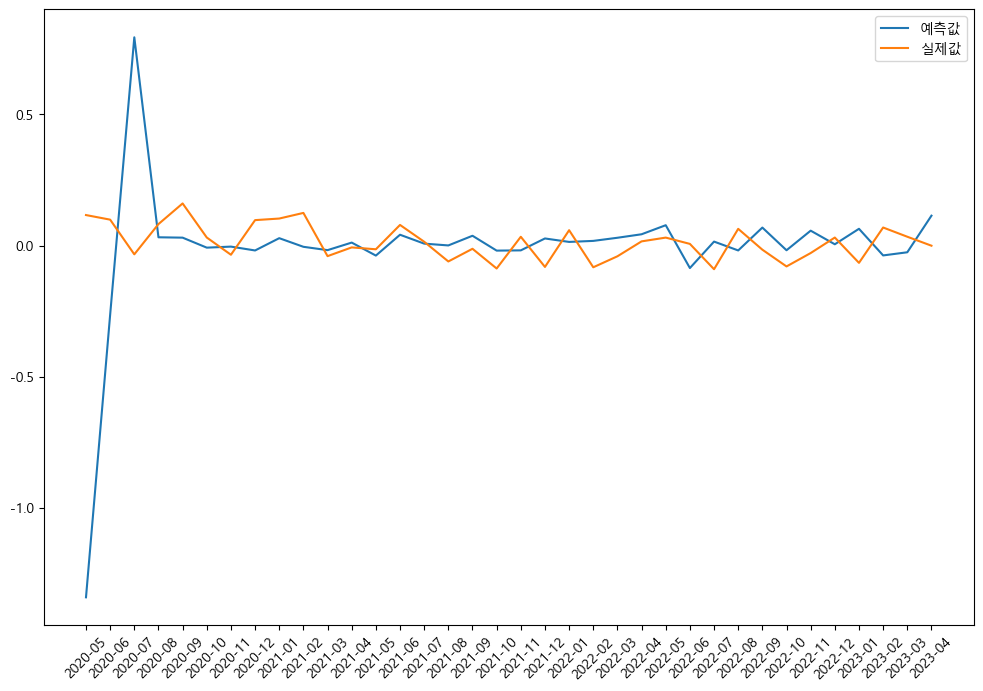

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

plt.plot(pred.index, pred['종가'],label='예측값')
plt.plot(test.index, test['종가'],label='실제값')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [61]:
show=pd.concat([pred['종가'],test['종가']], axis=1, keys=['예측', '실제'])
show

,예측,실제
2020-05,-1.341569,0.116203
2020-06,-0.263815,0.098670
2020-07,0.794030,-0.033584
2020-08,0.031429,0.081749
2020-09,0.030029,0.160504
2020-10,-0.008085,0.030546
2020-11,-0.004130,-0.035161
2020-12,-0.018834,0.096859
2021-01,0.028040,0.102901
2021-02,-0.004857,0.124357


In [62]:
a=df_origin[148:][['종가']]
show=pd.concat([show,a],axis=1).rename(columns={'종가':'실제종가'})
b=df_origin[147:]['종가'] * np.exp(show['예측'])
b=b.dropna()
show=pd.concat([show,b],axis=1)
show.rename(columns={0 : '예측종가'},inplace=True)

In [63]:
show

,예측,실제,실제종가,예측종가
2020-05,-1.341569,0.116203,1047.710000,273.908163
2020-06,-0.263815,0.098670,1156.360000,888.218124
2020-07,0.794030,-0.033584,1118.170000,2473.720571
2020-08,0.031429,0.081749,1213.420000,1252.162766
2020-09,0.030029,0.160504,1424.680000,1468.110689
2020-10,-0.008085,0.030546,1468.870000,1457.041835
2020-11,-0.004130,-0.035161,1418.120000,1412.275602
2020-12,-0.018834,0.096859,1562.350000,1533.200512
2021-01,0.028040,0.102901,1731.680000,1780.922814
2021-02,-0.004857,0.124357,1960.990000,1951.489404


In [64]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculate mean absolute error
mae = mean_absolute_error(show['실제종가'],show['예측종가'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(show['실제종가'], show['예측종가'])
print('MSE: %f' % mse) 
rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

MAE: 112.619604
MSE: 73494.122017
RMSE: 271.097993
